<a href="https://colab.research.google.com/github/AryaPulkit/Apparel-classification-webapp-using-CNN/blob/master/FashionApparel_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import numpy as np
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [4]:
#loading Fashion MNIST dataset
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
#Exploring the dataset
#checking shape and size of train and test set
print(str(len(x_train)),str(len(y_train)))
print(str(x_train[0].shape))
print(str(x_test[0].shape))

60000 60000
(28, 28)
(28, 28)


In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

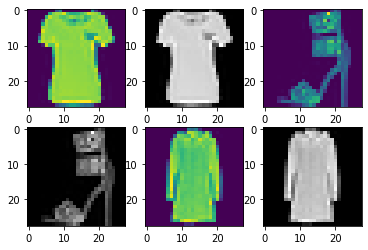

In [6]:
#Visualizing images
import matplotlib.pyplot as plt

plt.subplot(231) #subplot argument means 2 rows , columns and index 1 for this subplot
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])

plt.subplot(232) #Visualizing grayscale images
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(233) 
random_num2 = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num2])

plt.subplot(234) 
plt.imshow(x_train[random_num2],cmap=plt.get_cmap('gray'))

plt.subplot(235) 
random_num3 = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num3])

plt.subplot(236) 
plt.imshow(x_train[random_num3],cmap=plt.get_cmap('gray'))


In [0]:
#importing keras libraries

from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as K

#Set the training parameters
batch_size = 128

#storing the number of rows and columns for reshaping 
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#keras input format (number of samples ,rows,columns,channel )
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1) #channel = 1 for grayscale and 3 for RGB
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#storing the shape of single image
input_shape = (img_rows,img_cols,1)

#changing the image  to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Scaling the image pixel range (0-255) to (0-1)
x_train /= 255 #since image pixels ranges from 0 to 255 we divide by 255 to get values between 0 to 1
x_test /= 255 

#Performing one hot encoding
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

#Number of classes and number of pixels
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]


In [8]:
#Creating a CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = keras.optimizers.Adadelta(),metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [9]:
#Training models
cnn_model = model.fit(x_train,y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 23s 375us/step - loss: 0.4453 - accuracy: 0.8477 - val_loss: 1.5971 - val_accuracy: 0.4706
Epoch 2/100
60000/60000 [==============================] - 16s 265us/step - loss: 0.2870 - accuracy: 0.8989 - val_loss: 0.2674 - val_accuracy: 0.8993
Epoch 3/100
60000/60000 [==============================] - 16s 267us/step - loss: 0.2376 - accuracy: 0.9140 - val_loss: 0.2291 - val_accuracy: 0.9175
Epoch 4/100
60000/60000 [==============================] - 16s 266us/step - loss: 0.2118 - accuracy: 0.9245 - val_loss: 0.2481 - val_accuracy: 0.9135
Epoch 5/100
60000/60000 [==============================] - 16s 270us/step - loss: 0.1895 - accuracy: 0.9316 - val_loss: 0.2255 - val_accuracy: 0.9224
Epoch 6/100
60000/60000 [==============================] - 16s 266us/step - loss: 0.1690 - accuracy: 0.9390 - val_loss: 0.2263 - val_accuracy: 0.9237
Epoch 7/100
60000/60000 [=========================

In [10]:
print('Test loss:', score[0])
print('Test Accuracy:', score[1])

Test loss: 0.46157034028898924
Test Accuracy: 0.9326000213623047


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/image classifier/clothing')

In [0]:
#saving the model
model.save('clothing_classification_model.h5')